# Regression Evaluation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Why do we evaluate models?

- Does this model add any value?
- Which model is better?
- How confident am I in my model's predictions?

## Carne y Papas

- RMSE: 
    - how much error does the typical prediction has
    - same units as the target
    - **smaller is better**
- R2: 
    - variance in y (target) explained by X (predictor)
    - **closer to 1** is better
    
<a href = "https://docs.google.com/presentation/d/1To7AnQrj3oCJWx9xD7RO0e-fs5c9C61Z3hgxQS-DzG8/edit?usp=sharing"> Slide Deck </a>

## Can we predict the final grade of students based on score from 1st quiz?
x = score from exam1

y = final grade

In [2]:
# generate our student grade data

df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], 
                            [80, 85], [76, 80], [70, 68], [79, 75]]), 
                  columns = ['x', 'y'])

x = df['x']
y = df['y']

In [3]:
# Examine the dataframe

df

,x,y
0,100,96
1,93,90
2,84,89
3,80,85
4,76,80
5,70,68
6,79,75


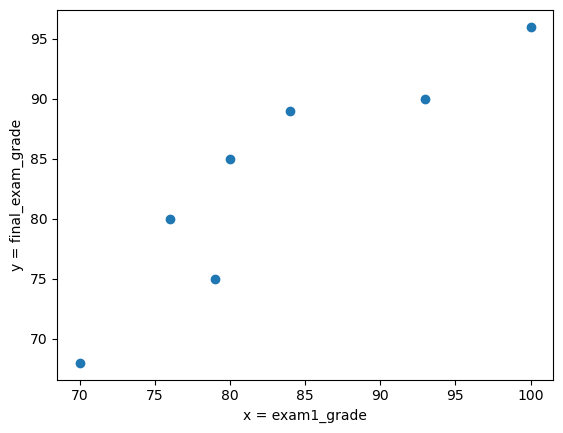

In [4]:
# Scaterplot of x:Exam Scores vs y: Final Exam Grade

plt.scatter(df.x, df.y)

plt.xlabel('x = exam1_grade')
plt.ylabel('y = final_exam_grade')
plt.show()

Linear Regression:

 - Does a set of independent variables do a good job in predicting an outcome (dependent) variable?  
 - Is the model good enough compared to a baseline?  
 - Is the model with features/ind variable valuable/significant compared to a model with no features? 

### Create a baseline prediction
- Make a prediction just based on dependent variable i.e. model with no independent variable
    - mean or median of dependent variable (we will use mean for this lesson)


In [5]:
# Calculate the predicted (y-hat) baseline: actual mean

yhat_baseline = df.y.mean()
yhat_baseline

83.28571428571429

In [6]:
# Add this column to the end of your existing df

df['baseline'] = yhat_baseline

In [7]:
df

,x,y,baseline
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714
3,80,85,83.285714
4,76,80,83.285714
5,70,68,83.285714
6,79,75,83.285714


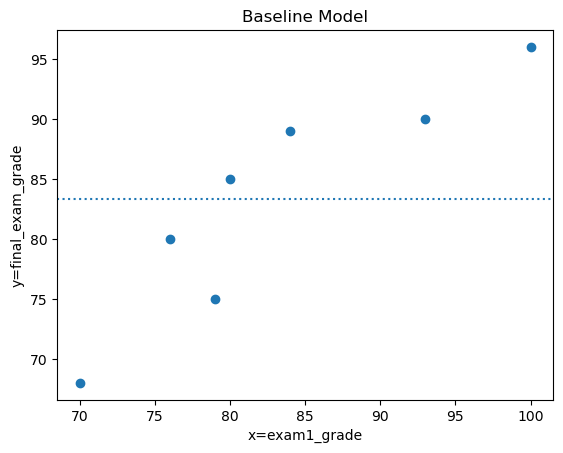

In [8]:
# plot data with baseline:

plt.scatter(df.x, df.y)
plt.axhline(yhat_baseline, ls=":")

plt.xlabel("x=exam1_grade")
plt.ylabel("y=final_exam_grade")
plt.title("Baseline Model")
plt.show()

## Ordinary Least Squares Linear Regression.

`LinearRegression` fits a linear model with coefficients w = (w1, …, wp) to minimize the **residual sum of squares** between the observed targets in the dataset, and the targets predicted by the linear approximation.

Reference: <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model.LinearRegression</a>
___

### Now we fit a regression model using OLS method
1. **make** the thing
2. **fit** the thing
3. **use** the thing




In [9]:
# Let's import our Linear Regression function

from sklearn.linear_model import LinearRegression

In [10]:
# OLS = ordinary least squares

# MAKE THE THING: create the model object
lm = LinearRegression()

# FIT THE THING: fit the model to training data
lm.fit(df[['x']], df.y)

# USE THE THING: make a prediction
# lm.predict will output a numpy array of values,
# we will put those values into a column in df
df['yhat'] = lm.predict(df[['x']])

In [11]:
df

,x,y,baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418
5,70,68,83.285714,72.097968
6,79,75,83.285714,79.759142


**Variables**
- `x`: exam1 score
- `y`: final exam score actual
- `baseline`: final exam baseline prediction
- `yhat`: final exam score OLS prediction

### Let's visualize the OLS Prediction:

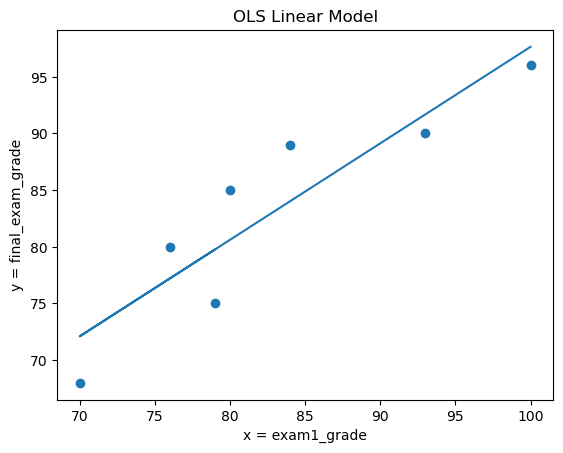

In [12]:
# visualize the line of best fit from OLS linear model

# The scatterplot consists of the **actual grades**
plt.scatter(df.x, df.y)
# The lineplot is my regression line used for predictions
plt.plot(df.x, df.yhat)

plt.xlabel('x = exam1_grade')
plt.ylabel('y = final_exam_grade')
plt.title('OLS Linear Model')
plt.show()

## Regression Metrics: Measure of dispersion/distance of datapoints around the fitted line
### Regression Metrics
- Compare to baseline
- Compare different models with different independent variables

### Vocabulary
- **Residual**: error (change in actual and predicted)
- **SSE**: sum of squared error
- **MSE**: mean squared error
- **RMSE**: root mean squared error

In [13]:
df

,x,y,baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418
5,70,68,83.285714,72.097968
6,79,75,83.285714,79.759142


### Calculate the residuals for both baseline (actual mean) and yhat (prediction).

In [14]:
# residual = actual - predicted

df['baseline_residual'] = df.y - df.baseline
df['residual'] = df.y - df.yhat

In [15]:
df

,x,y,baseline,yhat,baseline_residual,residual
0,100,96,83.285714,97.635214,12.714286,-1.635214
1,93,90,83.285714,91.676524,6.714286,-1.676524
2,84,89,83.285714,84.015350,5.714286,4.984650
3,80,85,83.285714,80.610384,1.714286,4.389616
4,76,80,83.285714,77.205418,-3.285714,2.794582
5,70,68,83.285714,72.097968,-15.285714,-4.097968
6,79,75,83.285714,79.759142,-8.285714,-4.759142


### Residuals for Baseline model

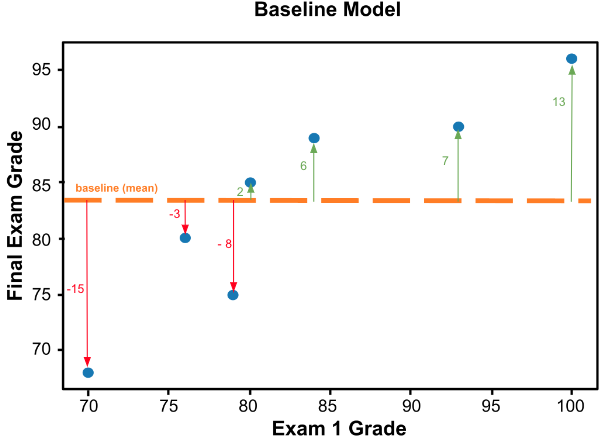

### Residuals for OLS model

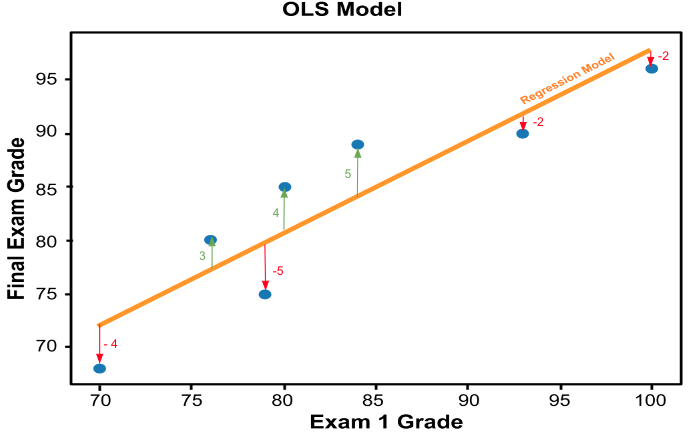

### Recall the goal of the `LinearRegression` function: 
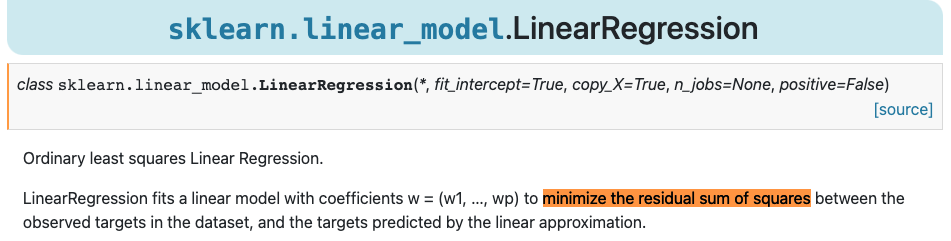

### What is the Sum of Residuals for these models?

In [16]:
#baseline residual sum

df.baseline_residual.sum()

-4.263256414560601e-14

In [17]:
#osl residual sum

df.residual.sum()

-1.4210854715202004e-14

> Both sums are pretty much zero, so summing residuals is not a helpful measure to finding line of best fit

In [18]:
df

,x,y,baseline,yhat,baseline_residual,residual
0,100,96,83.285714,97.635214,12.714286,-1.635214
1,93,90,83.285714,91.676524,6.714286,-1.676524
2,84,89,83.285714,84.015350,5.714286,4.984650
3,80,85,83.285714,80.610384,1.714286,4.389616
4,76,80,83.285714,77.205418,-3.285714,2.794582
5,70,68,83.285714,72.097968,-15.285714,-4.097968
6,79,75,83.285714,79.759142,-8.285714,-4.759142


#### 1. Calculate the **square** of the residuals 

In [22]:
# the difference between yhat and y, just squared

df['baseline_residual_2'] = df.baseline_residual**2
df['residual_2']= df.residual**2

In [23]:
df

,x,y,baseline,yhat,baseline_residual,residual,baseline_residual_2,residual_2
0,100,96,83.285714,97.635214,12.714286,-1.635214,161.653061,2.673926
1,93,90,83.285714,91.676524,6.714286,-1.676524,45.081633,2.810732
2,84,89,83.285714,84.015350,5.714286,4.984650,32.653061,24.846737
3,80,85,83.285714,80.610384,1.714286,4.389616,2.938776,19.268731
4,76,80,83.285714,77.205418,-3.285714,2.794582,10.795918,7.809691
5,70,68,83.285714,72.097968,-15.285714,-4.097968,233.653061,16.793345
6,79,75,83.285714,79.759142,-8.285714,-4.759142,68.653061,22.649435


#### 2. **Sum** up the residual squares

In [24]:
#add the residuals together
SSE_baseline = df.baseline_residual_2.sum()
SSE = df.residual_2.sum()

#### 3. Compare!

In [25]:
print(f"SSE Baseline = {SSE_baseline: .1f}")
print(f"SSE = {SSE:.1f}")

SSE Baseline =  555.4
SSE = 96.9


**Note:** In regression, the 'line of best fit' is one which minimizes the SSE

### MSE (Mean Squared Error)

- the average of your errors that have each been squared
- MSE = SSE/(no. of data points)
- This will be used to calculate RMSE in the next step


In [26]:
# calcaluate MSE

MSE_baseline = SSE_baseline/len(df)
MSE = SSE/len(df)

In [27]:
print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 79.3
MSE = 13.8


### RMSE (Root Mean Squared Error)
- Square root of MSE
- Same units as the output (y) variable

In [28]:
# Calculate RMSE = (MSE)^(1/2)

RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

In [29]:
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE baseline =  8.9
RMSE =  3.7


___
Flexing them math skills is all fine & dandy, but how about we let `sklearn` do some of the heavy lifting?

References: 
> <a href = "https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">sklearn 3.3.4: Regression Metrics</a>
> 
> <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">MSE - Mean Squared Error</a>


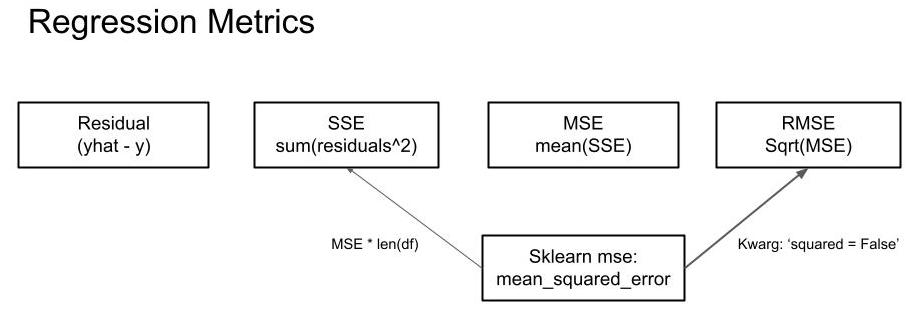

In [30]:
#import sklearn mean_square_error

from sklearn.metrics import mean_squared_error

### MSE (Mean Squared Error)


In [33]:
MSE2_baseline = mean_squared_error(df.y, df.baseline)
MSE2 = mean_squared_error(df.y, df.yhat)

In [34]:
print(f"MSE baseline: {MSE2_baseline: .8f}") 
print(f"MSE: {MSE2:.8f}") 

MSE baseline:  79.34693878
MSE: 13.83608513


### SSE (Sum of Squared Errors)

In [35]:
SSE2_baseline = MSE2_baseline * len(df)
SSE2 = MSE2 * len(df)

In [36]:
print(f"SSE baseline: {SSE2_baseline: .8f}") 
print(f"SSE: {SSE2: .8f}") 

SSE baseline:  555.42857143
SSE:  96.85259594


### RMSE (Root Mean Squared Error)

In [37]:
RMSE2_baseline = MSE2_baseline **.5
RMSE2 = MSE2 **.5

In [38]:
print(f"RMSE baseline: {RMSE2_baseline: .8f}")
print(f"RMSE: {RMSE2: .8f}") 

RMSE baseline:  8.90768987
RMSE:  3.71968885


#### You can also use sklearn.mean_squared_error('squared = False')
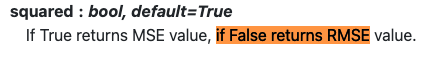

Reference: <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">sklearn MSE Documentation</a>

In [39]:
mean_squared_error(df.y, df.baseline, squared = False)

8.907689867497083

In [40]:
mean_squared_error(df.y, df.yhat, squared = False)

3.719688849060872

## Which metric to use?
Most often used:

- RMSE - Most commonly used - Same units as the dependent variable. Average distance of each point from fitted regression line

- SSE - If outliers matter, you can use SSE - Amplifies the effect of outliers
    - Residual 5 ----> SSE 25
    - Residual 10 ---> SSE 100

___
## How much of variance in target variable is explained by your independent variables?

 - $R^2$ - Coefficient of determination (0 to 1)
     - r2_score == explained_variance_score
 - Compares the fit of the chosen model with that of a horizontal straight line (baseline)


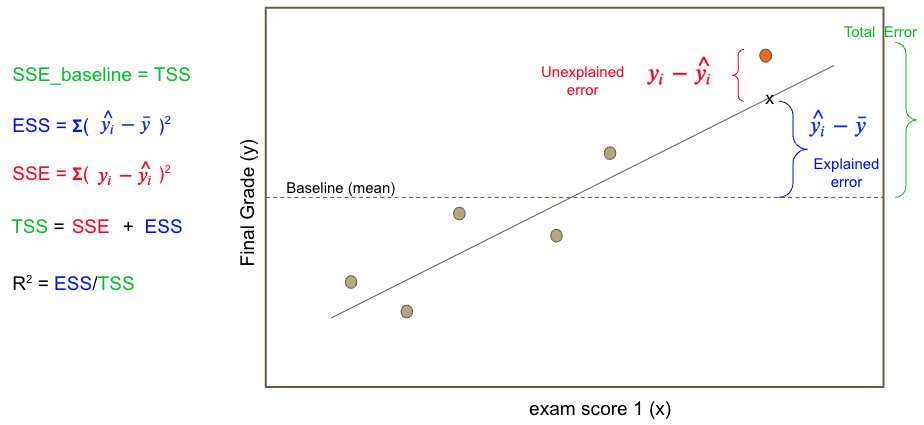
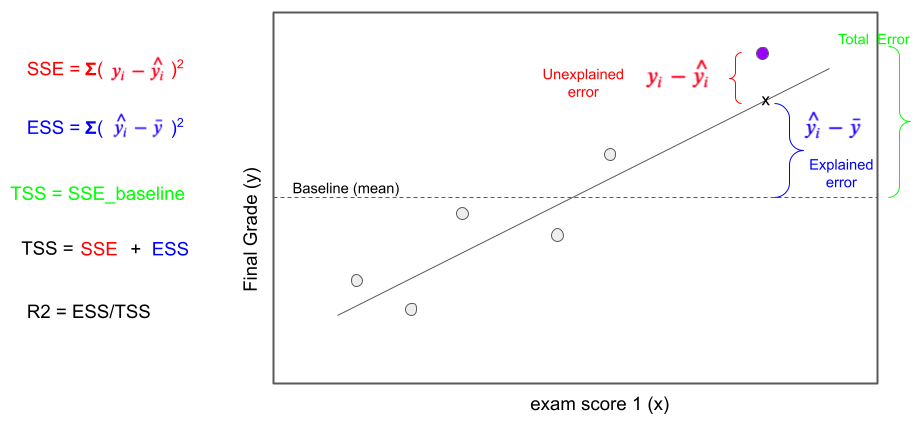

Distance between the point (value) and mean value (baseline) is 'Total Error'  
Total Error = 'Explained Error' (accounted by for regression) + 'Unexplained Error'  

ESS = Explained Sum of Squared Error  
TSS = Total sum of squared error

$R^2$ = ESS/TSS

$R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS)

*Note: TSS == SSE for baseline model (mean model)*

### Calculate R2 manually

In [41]:
# Total Sum of Squares = SSE for baseline

TSS = SSE_baseline
TSS

555.4285714285714

In [42]:
# Sum of Squared Error for the regression line (Unexplained error)

SSE

96.85259593679456

In [43]:
# ESS - Explained Sum of Squares ('Explained Error')

ESS = TSS - SSE
ESS

458.5759754917769

In [44]:
# Calculate R^2 
R2 = ESS/TSS
R2


0.8256254702784048

### Calculate R2 with sklearn

In [45]:
#import r2_score from sklearn

from sklearn.metrics import r2_score

In [46]:
df

,x,y,baseline,yhat,baseline_residual,residual,baseline_residual_2,residual_2
0,100,96,83.285714,97.635214,12.714286,-1.635214,161.653061,2.673926
1,93,90,83.285714,91.676524,6.714286,-1.676524,45.081633,2.810732
2,84,89,83.285714,84.015350,5.714286,4.984650,32.653061,24.846737
3,80,85,83.285714,80.610384,1.714286,4.389616,2.938776,19.268731
4,76,80,83.285714,77.205418,-3.285714,2.794582,10.795918,7.809691
5,70,68,83.285714,72.097968,-15.285714,-4.097968,233.653061,16.793345
6,79,75,83.285714,79.759142,-8.285714,-4.759142,68.653061,22.649435


In [47]:
#use r2_score

r2_score(df.y, df.yhat)

0.8256254702784048